In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Define temperature range
#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)

# Define temperature conversion functions
def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

# Load Henry's Law Constants:
DR = pd.read_csv("../../../../Data/HenrysLawData.csv", index_col = "Compound")["DR"]
HR = pd.read_csv("../../../../Data/HenrysLawData.csv", index_col = "Compound")["HR"]
kh = pd.read_csv("../../../../Data/HenrysLawData.csv", index_col = "Compound")["k"]
theta = 1.022 # temperature correction factor

# Effect of the gas velocity on kLa

In [3]:
h_r = 30 # height of the reactor [m]
ar = 5 # aspect ratio: height to diameter

r = h_r/(ar * 2)
h = 2/3 * h_r # initial height of broth  assuming it is 2/3 filled [m]
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h #reactor volume [m^3]

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

h,r,A,V_L

(20.0, 3.0, 28.274333882308138, 565.4866776461628)

For v_gas above 0.3 m/s the homogeneous flow of gas bubbles through the column becomes unpredictable and heterogeneous, with kLa dropping

compare Heijnen kLa estimate to one that accounts for viscosity: GAS/LIQUID MASS TRANSFER IN A SLURRY BUBBLE
COLUMN; SCHUMPE et al.

In [4]:
v_gas = np.arange(0, 0.3, 0.001)

# Kla Temperature correction:
def KLa(C,T,v_gas):
    return 0.32 * (DR[C]/DR["O2"])**0.5 * v_gas**0.7 * theta**(T-293.15)# * 3600 #[1/s]

def µ_eff(c_x): #(g.DCW/L)
    return 5.38 * 10**(-5) * c_x + 0.00062

def KLa_Schumpeetal(C,T,v_gas,µ_eff):
    return 0.042 * v_gas**0.82 * µ_eff**(-0.39)

µ_eff from: Investigating and modelling the effects of cell lysis on the rheological
properties of fermentation broths; Joseph M. Newton, Joanna Vlahopoulou, Yuhong Zhou

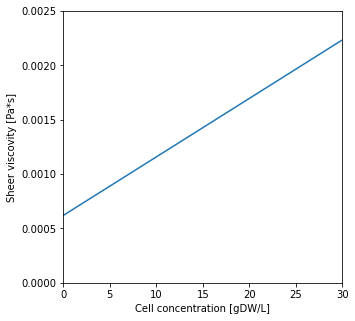

In [5]:
c_x = np.arange(0, 30, 0.1)

fig = plt.figure(figsize=(5,5))
plt.plot(c_x, µ_eff(c_x))
plt.axis([0, 30, 0, 0.0025])
plt.xlabel('Cell concentration [gDW/L]')
plt.ylabel('Sheer viscovity [Pa*s]')

plt.show()

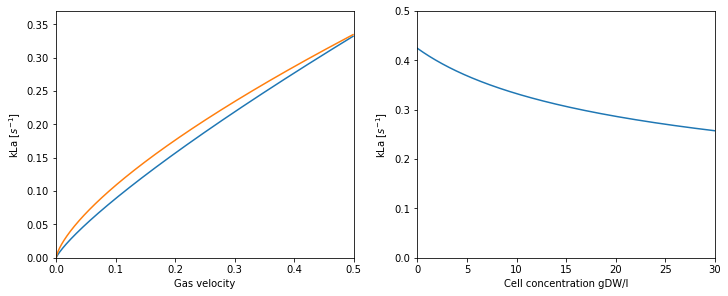

In [8]:
T = 300
v_gas_R = 0.5
v_gas = np.arange(0, 0.5, 0.001)
c_xR = 10
c_x = np.arange(0.0, 30.1, 0.1)

fig, axs = plt.subplots(nrows = 1, ncols = 2, constrained_layout=True, figsize=(10,4))

axs[0].plot(v_gas, KLa_Schumpeetal("H2",T,v_gas,µ_eff(c_xR)))
axs[0].plot(v_gas, KLa("H2",T,v_gas))
axs[1].plot(c_x, KLa_Schumpeetal("H2",T,v_gas_R,µ_eff(c_x)))

axs[0].set_ylabel(r'kLa [$s^{-1}$]')
axs[0].set_xlabel('Gas velocity')
axs[0].set_ylim(0, 0.37)
axs[0].set_xlim(0, 0.5)
axs[1].set_ylabel(r'kLa [$s^{-1}$]')
axs[1].set_xlabel(r'Cell concentration gDW/l')
axs[1].set_ylim(0, 0.5)
axs[1].set_xlim(0, 30)

plt.show()

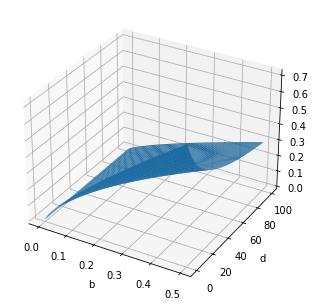

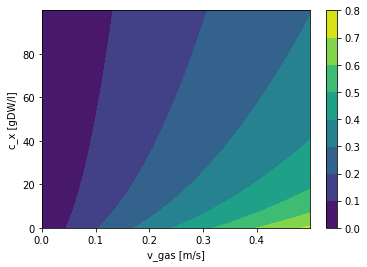

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

b = np.arange(0, 0.5, 0.001)
d = np.arange(0, 100, 0.1)

B, D = np.meshgrid(b, d)
KLa_mesh = (DR["H2"]/DR["O2"])**0.5 *0.042 * B**0.82*(5.38*10**(-5)*D+0.00062)**(-0.39)*theta**(T-293.15)
#v_gas_mesh = b**2.564*(5.38*10**(-5)*b+0.00062) * m_NGAM(T)/(math.sqrt(DR.H2/DR.O2)*0.042*theta**(T-293.15)*DrGT(T)*(-1/4))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, KLa_mesh)
plt.xlabel('b')
plt.ylabel('d')
plt.show()

plt.contourf(B, D, KLa_mesh)
plt.colorbar()
plt.xlabel('v_gas [m/s]')
plt.ylabel('c_x [gDW/l]')
plt.show()